# EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [2]:
pip install kneed

## Import Data


In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/student_dropout_behavior_dataset.csv")
df.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,NaN,30.0,36.5,2.57,12,4,6,1
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,NaN,25.4,33.0,2.40,12,1,6,5
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,NaN,14.4,24.8,2.99,12,0,6,0
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,NaN,17.7,41.0,1.68,12,9,6,0
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,NaN,23.8,31.0,2.53,12,7,6,4


## Check for missing values

In [22]:
print(df.isnull().sum())

student_id                 0
name                       0
age                        0
gender                     0
quiz1_marks                0
quiz2_marks                0
quiz3_marks                0
total_assignments          0
assignments_submitted    300
midterm_marks              0
final_marks                0
previous_gpa               0
total_lectures             0
lectures_attended          0
total_lab_sessions         0
labs_attended              0
dtype: int64


## Check Unique Value

In [23]:
print("Unique values for Name:", df['name'].unique())
print("Unique values for Total Lecture:", df['total_lectures'].unique())
print("Unique values for Total Assignments:", df['total_assignments'].unique())
print("Unique values for total lab sessions:", df['total_lab_sessions'].unique())


Unique values for Name: ['Kristina Vaughan' 'Rodney Daniels' 'Jose Nash' 'Nicole Martin'
 'Shelby Smith' 'Austin Griffin' 'Crystal Jordan' 'Sandra Patterson'
 'Rachael Miles' 'Matthew Rice' 'Lawrence Powers' 'Joshua Henry'
 'Jamie Jones' 'Rita Olson' 'Matthew Williams' 'Terry Little'
 'Doris Larson' 'Gregg Gonzales' 'Pamela Jones' 'Mark Allen'
 'Sherri Wheeler' 'Jeffrey Martin' 'Sandra Smith' 'Colton Bradley'
 'Amy Johnson' 'Ryan Lyons' 'Dr. Andrew Chang' 'Michael Williamson Jr.'
 'Jessica Hart' 'Stephanie Gonzales' 'Dr. Jamie Mclaughlin' 'Diana Martin'
 'Jessica Russell' 'Christopher Buchanan' 'Sean Bates' 'Stephen Khan'
 'Patricia Macias' 'Michael Davis' 'Richard Savage' 'Maria Pennington'
 'Stephanie Yoder' 'Maria Rasmussen' 'Melanie Cox' 'Carol Walls'
 'Brandon Garcia' 'David Williams' 'Eric Hodge' 'Daniel Nguyen'
 'Elizabeth Cook' 'Tracy Myers' 'Ernest Payne' 'Richard Rich'
 'Jonathan Francis' 'Olivia Jones' 'Ernest Allen' 'Jacob Ramirez'
 'Jay Morris' 'Michelle Schultz' 'Lisa Ing

## Drop Column

In [24]:
columns_to_drop = ['student_id', 'name', 'assignments_submitted', 'total_assignments','total_lectures','total_lab_sessions']
df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,19,Male,8.0,5.7,7.4,30.0,36.5,2.57,4,1
1,21,Male,10.0,7.9,4.1,25.4,33.0,2.40,1,5
2,19,Female,7.5,1.2,0.3,14.4,24.8,2.99,0,0
3,21,Male,5.2,2.5,9.9,17.7,41.0,1.68,9,0
4,21,Female,5.9,6.3,2.0,23.8,31.0,2.53,7,4


<span style="color: blue; font-style: italic;">No missing value in this data, good to proceed with descriptive analytics!</span>



## Check Data Information



In [25]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                300 non-null    int64  
 1   gender             300 non-null    object 
 2   quiz1_marks        300 non-null    float64
 3   quiz2_marks        300 non-null    float64
 4   quiz3_marks        300 non-null    float64
 5   midterm_marks      300 non-null    float64
 6   final_marks        300 non-null    float64
 7   previous_gpa       300 non-null    float64
 8   lectures_attended  300 non-null    int64  
 9   labs_attended      300 non-null    int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 23.6+ KB


## Descriptive Statistics

In [26]:
df_cleaned.describe()

,age,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,21.550000,7.254667,5.866667,5.469000,19.969000,37.375000,2.806033,6.013333,3.110000
std,2.241483,1.611791,2.414786,2.711083,8.272229,11.796774,0.732694,3.726407,1.982676
min,18.000000,2.800000,0.000000,0.000000,0.000000,0.000000,0.610000,0.000000,0.000000
25%,20.000000,6.075000,4.000000,3.600000,14.225000,29.875000,2.327500,3.000000,1.000000
50%,22.000000,7.300000,5.800000,5.600000,21.350000,39.600000,2.800000,6.000000,3.000000
75%,23.000000,8.400000,7.700000,7.200000,27.425000,49.550000,3.320000,9.000000,5.000000
max,25.000000,10.000000,10.000000,10.000000,30.000000,50.000000,4.000000,12.000000,6.000000


## Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_cleaned.copy()

le = LabelEncoder()

df_encoded['gender'] = le.fit_transform(df_encoded['gender'])

df_encoded.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,19,1,8.0,5.7,7.4,30.0,36.5,2.57,4,1
1,21,1,10.0,7.9,4.1,25.4,33.0,2.40,1,5
2,19,0,7.5,1.2,0.3,14.4,24.8,2.99,0,0
3,21,1,5.2,2.5,9.9,17.7,41.0,1.68,9,0
4,21,0,5.9,6.3,2.0,23.8,31.0,2.53,7,4


Boxplot for all numerical features

In [28]:
numerical_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()
if 'Continent' in numerical_cols:
    numerical_cols.remove('Continent')

print(f"Numerical columns (excluding Education): {numerical_cols}")

Numerical columns (excluding Education): ['age', 'gender', 'quiz1_marks', 'quiz2_marks', 'quiz3_marks', 'midterm_marks', 'final_marks', 'previous_gpa', 'lectures_attended', 'labs_attended']


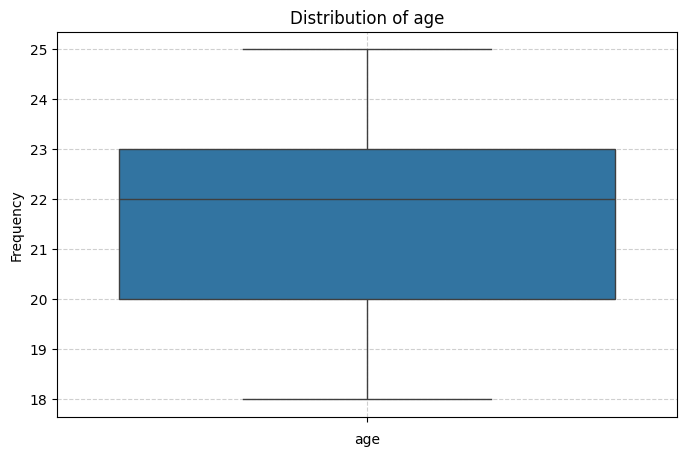

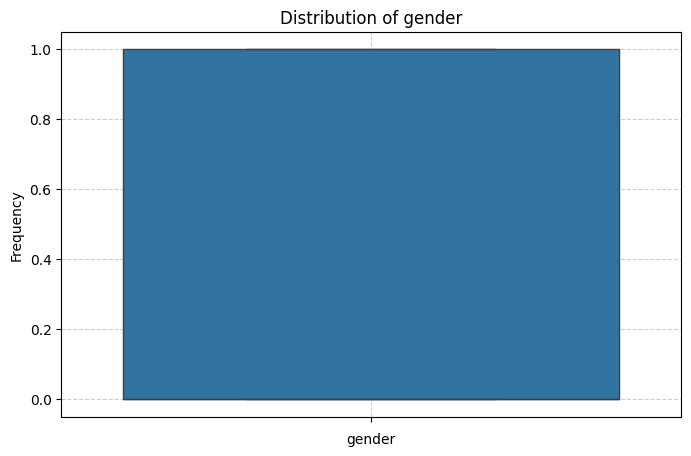

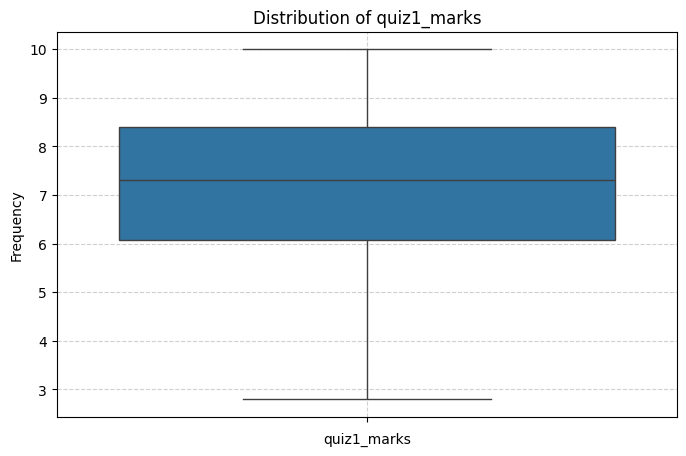

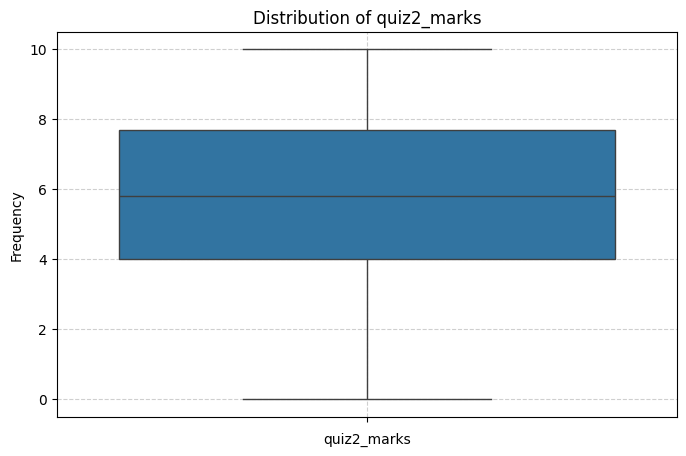

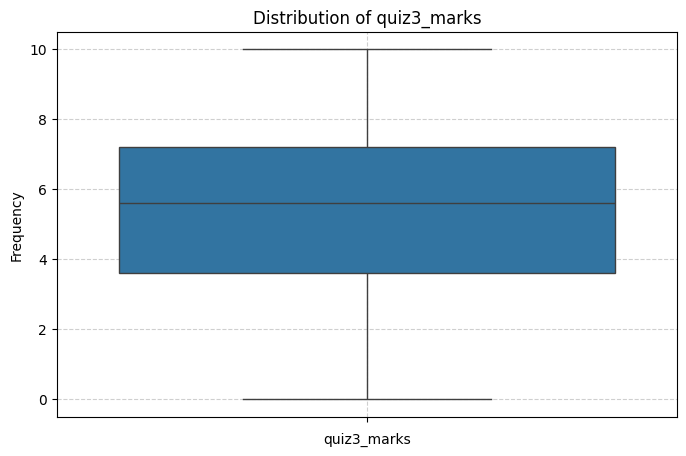

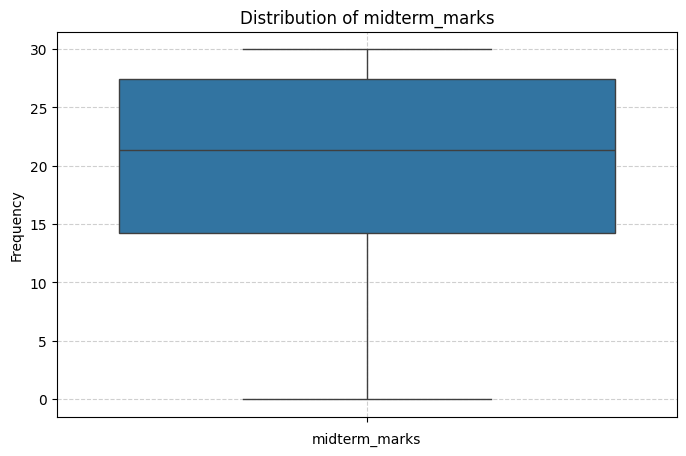

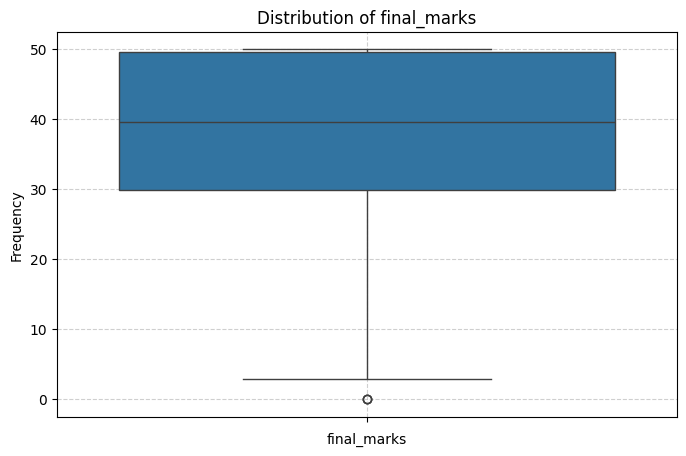

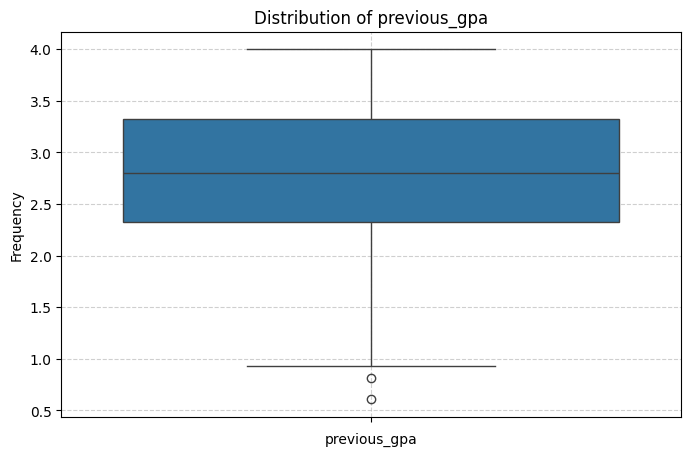

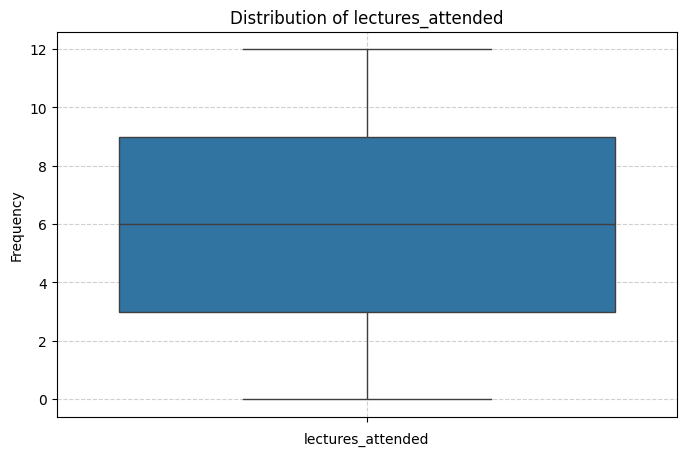

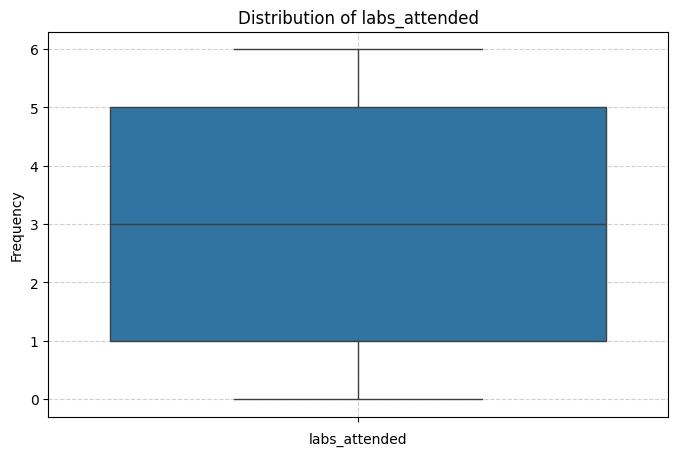

In [29]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(df_encoded[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

Insights

Cuma ada sedikit outlier yang ada di bagian previous_gpa. Dan sebelumnya ada beberapa kolom yang memiliki nilai yang sama, karena itu kita drop kolom yang hanya memiliki satu values.

Distribusi pada umur ada pada kebanyakan ada pada 20-23 tahun.

# Visualisation

In [49]:
df_cleaned.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,19,Male,8.0,5.7,7.4,30.0,36.5,2.57,4,1
1,21,Male,10.0,7.9,4.1,25.4,33.0,2.40,1,5
2,19,Female,7.5,1.2,0.3,14.4,24.8,2.99,0,0
3,21,Male,5.2,2.5,9.9,17.7,41.0,1.68,9,0
4,21,Female,5.9,6.3,2.0,23.8,31.0,2.53,7,4


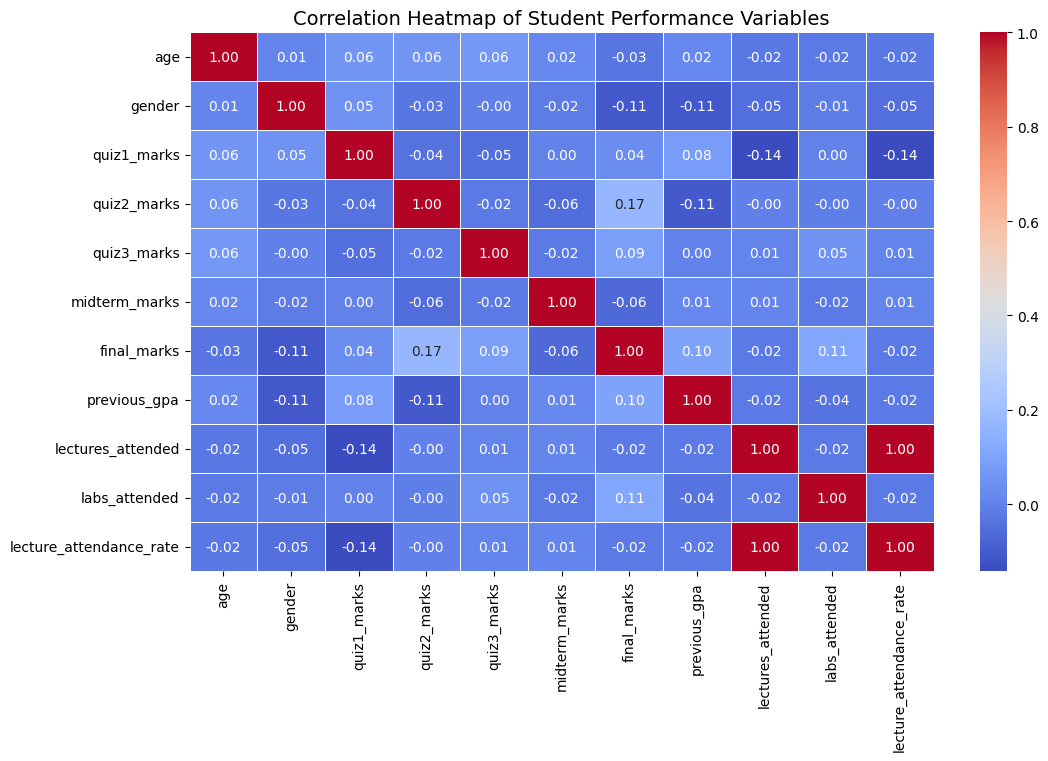

In [55]:

# Hitung korelasi
corr = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Student Performance Variables", fontsize=14)
plt.show()

Nilai akhir siswa paling kuat berkorelasi dengan UTS dan Quiz 2 (koefisien positif 0.17 dan 0.10). Secara umum, tidak ada variabel tunggal (termasuk GPA atau kehadiran) yang menjadi prediktor kuat, karena semua korelasi sangat lemah. Performa saat ini (tengah semester) lebih menentukan daripada modal akademik masa lalu.

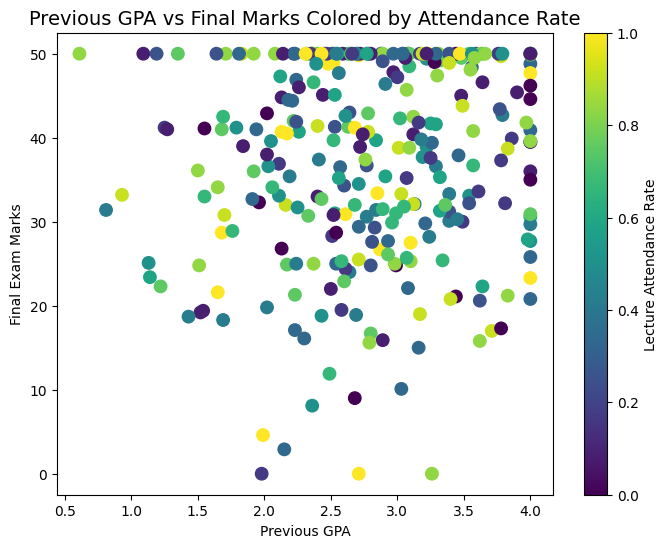

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat figure & axes
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot
scatter = ax.scatter(
    df["previous_gpa"],
    df["final_marks"],
    c=df["lecture_attendance_rate"],
    cmap="viridis",
    s=80
)

# Labels
ax.set_title("Previous GPA vs Final Marks Colored by Attendance Rate", fontsize=14)
ax.set_xlabel("Previous GPA")
ax.set_ylabel("Final Exam Marks")

# Colorbar — now using the correct axes
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label("Lecture Attendance Rate")

plt.show()

GPA awal tidak menjamin nilai akhir tinggi. Kehadiran kuliah yang tinggi (warna cerah) adalah pendorong utama nilai akhir optimal, karena sebagian besar siswa dengan kehadiran tinggi mencapai skor di atas 40.

# DATA STANDARDIZATION

In [30]:
scaler = StandardScaler()

df_transformed = df_encoded.copy()

# Apply StandardScaler to the identified numerical columns
df_transformed = scaler.fit_transform(df_transformed)

# Convert the numpy array back to a DataFrame with original column names for display
df_transformed = pd.DataFrame(df_transformed, columns=df_encoded.columns)

# Display the head of the transformed DataFrame to verify
print("DataFrame after standardizing numerical columns:")
df_transformed.head()

DataFrame after standardizing numerical columns:


,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,-1.139540,1.033908,0.463198,-0.069135,0.713452,1.214638,-0.074297,-0.322683,-0.541191,-1.065997
1,-0.245783,1.033908,1.706127,0.843441,-0.505808,0.657631,-0.371484,-0.555091,-1.347601,0.954850
2,-1.139540,-0.967204,0.152466,-1.935767,-1.909804,-0.674341,-1.067750,0.251502,-1.616404,-1.571208
3,-0.245783,1.033908,-1.276902,-1.396518,1.637133,-0.274750,0.307801,-1.539408,0.802826,-1.571208
4,-0.245783,-0.967204,-0.841877,0.179750,-1.281700,0.463890,-0.541305,-0.377367,0.265219,0.449638


#  PRINCIPAL COMPONENT ANALYSIS


Ref: https://statisticsglobe.com/principal-component-analysis-python

First, we should choose the ideal number of components before interpreting the results. One alternative is to conduct a PCA for all or an arbitrarily large number of components, then visualize the percentage of explained variance or the eigenvalues per component using a scree plot. Based on the graph, the optimal number can be selected. Let’s run our PCA for ten components!

In [31]:
pca = PCA(n_components=10) #why 10 bcs that is total column we have

pca.fit_transform(df_transformed)

array([[-0.97007566,  0.2512717 , -0.25805316, ...,  0.85514088,
         0.45257755, -0.12896213],
       [-0.45724346,  1.36835954, -1.83594652, ...,  0.2551258 ,
         0.22929964, -0.80266358],
       [-1.96403679,  1.12191215,  1.15890334, ..., -1.86424152,
         0.21494869,  0.84807189],
       ...,
       [ 1.45037555, -1.72779316, -0.85169893, ..., -2.05382793,
        -0.84592089, -0.09354937],
       [ 0.19650367,  0.58542457, -1.07754827, ...,  0.28224409,
        -1.59742038, -1.04536431],
       [ 0.4313977 , -0.12781585, -0.27204428, ...,  0.95386868,
        -0.22568525,  0.57699358]])

Once we have our PCA done, we can extract the proportion of variance explained and the eigenvalues as follows.

In [32]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

We will plot the scree plot using the proportion of variance explained.

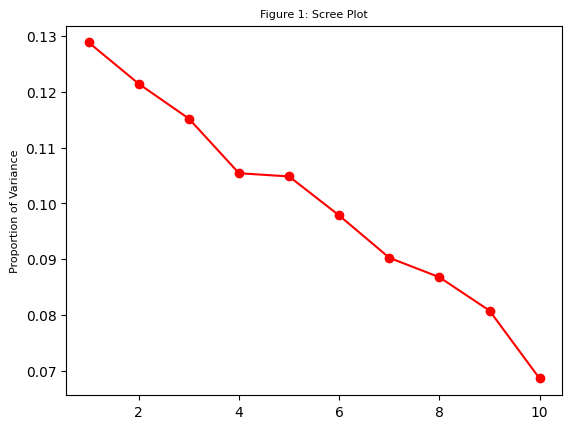

In [33]:
PC_numbers = np.arange(pca.n_components_) + 1

plt.plot(PC_numbers,
         prop_var,
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

In [34]:
pca_full = PCA().fit(df_transformed)
explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

print("\nExplained variance per PC (percent) & cumulative:")
for i, (e, c) in enumerate(zip(explained*100, cum_explained*100), start=1):
    print(f"PC{i:02d}: {e:.2f}%  |  Cumulative: {c:.2f}%")


Explained variance per PC (percent) & cumulative:
PC01: 12.88%  |  Cumulative: 12.88%
PC02: 12.14%  |  Cumulative: 25.02%
PC03: 11.52%  |  Cumulative: 36.54%
PC04: 10.54%  |  Cumulative: 47.08%
PC05: 10.48%  |  Cumulative: 57.57%
PC06: 9.78%  |  Cumulative: 67.35%
PC07: 9.03%  |  Cumulative: 76.38%
PC08: 8.68%  |  Cumulative: 85.06%
PC09: 8.08%  |  Cumulative: 93.14%
PC10: 6.86%  |  Cumulative: 100.00%


Based on the result, the 8 principal components account for 12.88% + 12.14% + 11.52% + 10.54% + 10.48% + 9.78% + 9.03% + 8.68% = 85.06% of the variance in the data.

Since 85.06% is a considerable amount, it is sufficient to retain the four principal components in the analysis.

In [35]:
pca = PCA(n_components=8)
PC = pca.fit_transform(df_transformed)

Let’s store the component scores in a DataFrame and check it via the head() method!

In [36]:
df_pca = pd.DataFrame(data = PC, columns = ['PC01', 'PC02', 'PC03', 'PC04', 'PC05', 'PC06', 'PC07', 'PC08'])

df_pca.head(5)

,PC01,PC02,PC03,PC04,PC05,PC06,PC07,PC08
0,-0.970076,0.251272,-0.258053,-0.062800,0.222625,0.235991,-1.994340,0.855141
1,-0.457243,1.368360,-1.835947,-0.729976,0.223127,1.337209,-0.170171,0.255126
2,-1.964037,1.121912,1.158903,-2.088251,-0.433858,-0.993234,-0.394735,-1.864242
3,-0.905380,-1.742435,-0.160315,1.173438,0.828061,-1.455974,-1.314544,0.528984
4,-0.263028,-0.942491,0.606325,-0.768840,-0.450677,1.027836,0.575022,-0.855673


Now, we can form the biplot. For further information on how to do this, see Biplot in Python. Here, we will use a user-defined biplot() function for the implementation.

In [37]:
def biplot(score,coef,labels=None, colors=None):

    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    if colors is not None:
        unique_clusters = np.unique(colors)
        for cluster_label in unique_clusters:
            # Filter points belonging to the current cluster
            cluster_mask = (colors == cluster_label)
            plt.scatter(xs[cluster_mask] * scalex,
                        ys[cluster_mask] * scaley,
                        s=5,
                        label=f'Cluster {int(cluster_label)}')
        plt.legend()
    else:
        plt.scatter(xs * scalex,ys * scaley,
                    s=5,
                    color='orange') # Changed 'color' to 'c' and used 'colors' parameter

    for i in range(n):
        plt.arrow(0, 0, coef[i,0],
                  coef[i,1],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,0]* 1.2, # Adjusted position
                 coef[i,1] * 1.2, # Adjusted position
                 labels[i],
                 color = 'darkblue',
                 ha = 'center',
                 va = 'center')
    # --------------------------------------
    # ADD DOTTED REFERENCE LINES (like example)
    # --------------------------------------
    plt.axhline(0, color='black', linestyle='dotted', linewidth=1)
    plt.axvline(0, color='black', linestyle='dotted', linewidth=1)

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))


After defining our function, we just have to call it.



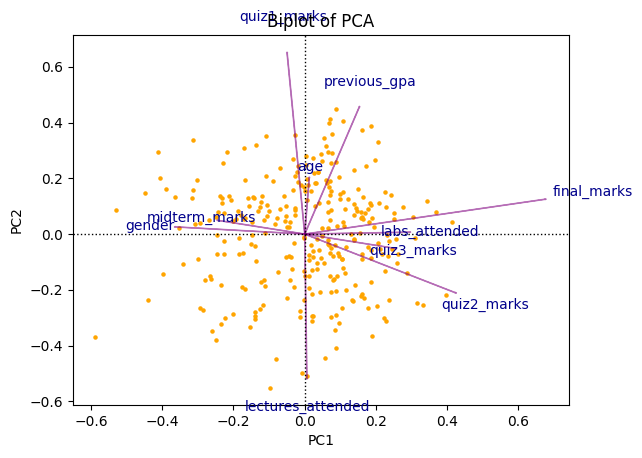

In [38]:
plt.title('Biplot of PCA')

biplot(PC,
       np.transpose(pca.components_),
       list(df_transformed.columns))

**PC1 – Overall Academic Performance**

PC1 terutama merepresentasikan dimensi overall academic performance, ditandai oleh kontribusi kuat dari final_marks, quiz2_marks, quiz3_marks, labs_attended, dan previous_gpa. Mahasiswa dengan skor tinggi pada PC1 cenderung menunjukkan performa akademik yang solid dan konsisten—nilai ujian tinggi, kuis baik, serta partisipasi lab yang aktif. Dengan demikian, PC1 dapat dianggap sebagai indikator utama kualitas pencapaian belajar secara keseluruhan.

**PC2 – Attendance Discipline vs Baseline Knowledge**

PC2 memisahkan mahasiswa berdasarkan perbedaan antara kedisiplinan kehadiran dan kemampuan akademik dasar. Lectures_attended menjadi kontributor terbesar pada sisi negatif PC2, sedangkan previous_gpa dan quiz1_marks menonjol pada sisi positif. Ini menunjukkan bahwa PC2 membedakan mahasiswa yang rajin dan disiplin hadir dari mereka yang memiliki kemampuan awal yang tinggi, sehingga mencerminkan keseimbangan antara usaha (attendance) dan kapasitas awal (baseline performance).

#  K-MEANS CLUSTERING

You need to decide how many clusters (K) you want to create. One way to do this is by using the elbow method, which plots the within-cluster sum of squares (WCSS) for different values of K and looks for the "elbow" point where the WCSS starts to level off.

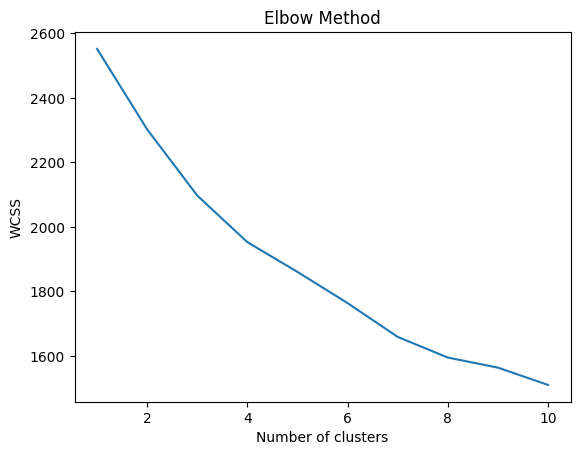

In [39]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  2551.662715
1                   2  2302.291126
2                   3  2097.107129
3                   4  1952.708394
4                   5  1860.515083
5                   6  1763.806878
6                   7  1659.037766
7                   8  1595.024202
8                   9  1563.845563
9                  10  1510.186332


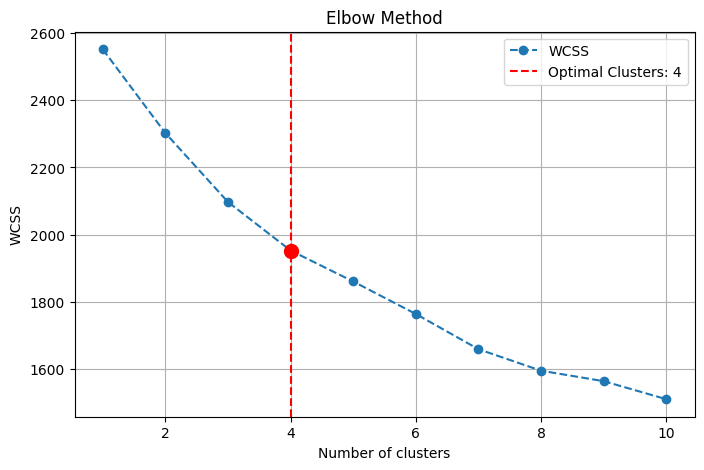

The optimal number of clusters is: 4


In [41]:
from kneed import KneeLocator  # Library to detect the "knee" point

# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")


In [42]:
# Fit K-Means to the data with optimal cluster
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++',random_state=42)
kmeans_cluster = kmeans.fit_predict(df_pca)

# Add the cluster labels to the DataFrame
df['KMeans'] = kmeans_cluster
df_transformed['KMeans'] = kmeans_cluster

In [43]:
# Evaluation
ss = silhouette_score(df_pca, kmeans_cluster)
print(ss)

0.10373863440575633


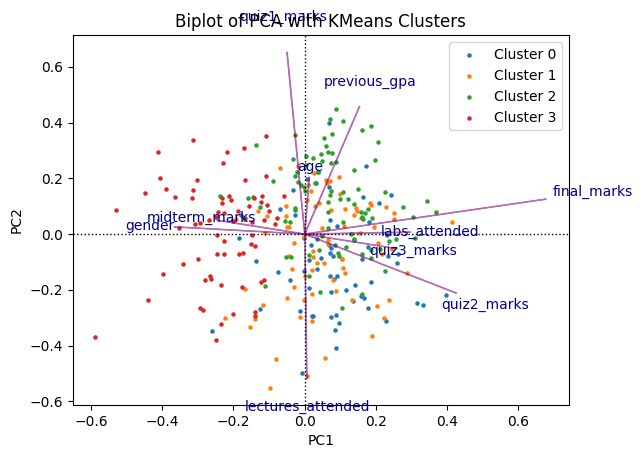

In [44]:
plt.title('Biplot of PCA with KMeans Clusters')
biplot(PC,
       np.transpose(pca.components_),
       list(df_transformed.columns),
       colors=df_transformed['KMeans'])
plt.show()

In [46]:
df_cleaned.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,19,Male,8.0,5.7,7.4,30.0,36.5,2.57,4,1
1,21,Male,10.0,7.9,4.1,25.4,33.0,2.40,1,5
2,19,Female,7.5,1.2,0.3,14.4,24.8,2.99,0,0
3,21,Male,5.2,2.5,9.9,17.7,41.0,1.68,9,0
4,21,Female,5.9,6.3,2.0,23.8,31.0,2.53,7,4


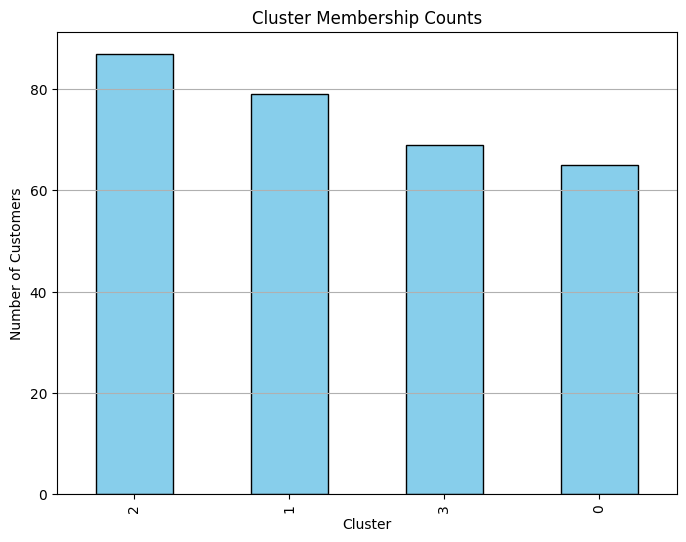

In [47]:
cluster_counts = df['KMeans'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

# Profiling

In [61]:
cluster_profiles = df.groupby('KMeans').mean(numeric_only=True)
print("Cluster Profiles (Mean of Numerical Features per Cluster):")
print(cluster_profiles)

Cluster Profiles (Mean of Numerical Features per Cluster):
        student_id        age  quiz1_marks  quiz2_marks  quiz3_marks  \
KMeans                                                                 
0       139.261538  20.353846     6.501538     6.441538     4.010769   
1       155.025316  21.417722     7.112658     6.765823     6.375949   
2       153.885057  22.885057     7.682759     5.521839     6.871264   
3       151.637681  21.144928     7.586957     4.730435     4.036232   

        total_assignments  assignments_submitted  midterm_marks  final_marks  \
KMeans                                                                         
0                     5.0                    NaN      17.960000    40.035385   
1                     5.0                    NaN      14.010127    40.705063   
2                     5.0                    NaN      23.775862    40.979310   
3                     5.0                    NaN      23.884058    26.511594   

        previous_gpa  total

In [62]:
cluster_summary = df.groupby('KMeans').agg({
    'gender': [('mode', lambda x: x.mode()[0]), 'count'],
    'age': ['mean', 'std', 'min', 'max'],
    'quiz1_marks': ['mean', 'std', 'min', 'max'],
    'quiz2_marks': ['mean', 'std', 'min', 'max'],
    'quiz3_marks': ['mean', 'std', 'min', 'max'],
    'midterm_marks': ['mean', 'std', 'min', 'max'],
    'final_marks': ['mean', 'std', 'min', 'max'],
    'previous_gpa': ['mean', 'std', 'min', 'max'],
    'lectures_attended': ['mean', 'std', 'min', 'max'],
    'labs_attended': ['mean', 'std', 'min', 'max'],
})

# Rename the index to 'cluster' for clarity
cluster_summary = cluster_summary.rename_axis('Cluster')

# Display the cluster summary
display(cluster_summary)

gender              age                   quiz1_marks                 \
           mode count       mean       std min max        mean       std  min   
Cluster                                                                         
0        Female    65  20.353846  1.956007  18  25    6.501538  1.488234  2.8   
1          Male    79  21.417722  2.204934  18  25    7.112658  1.440830  3.6   
2        Female    87  22.885057  1.826327  18  25    7.682759  1.605818  3.8   
3          Male    69  21.144928  2.204777  18  25    7.586957  1.668472  3.6   

               ... previous_gpa      lectures_attended                    \
          max  ...          min  max              mean       std min max   
Cluster        ...                                                         
0        10.0  ...         1.14  4.0          7.692308  3.673907   0  12   
1        10.0  ...         0.61  4.0          5.620253  3.687483   0  12   
2        10.0  ...         1.27  4.0          4.977011  3.586075   0  12   
3        10.0  ...         1.43  4.0          6.188406  3.494851   0  12   

        labs_attended                    
                 mean       std min max  
Cluster                                  
0            2.876923  1.916276   0   6  
1            3.784810  1.773530   0   6  
2            3.586207  1.839816   0   6  
3            1.956522  1.928385   0   6  

[4 rows x 38 columns]

Cluster 0: Perempuan, performa rendah–sedang, tetapi attendance tinggi → butuh peningkatan akademik.

Cluster 1: Laki-laki, performa sedang, attendance moderat → kelompok rata-rata.

Cluster 2: Perempuan, performa akademik tertinggi dan GPA kuat → high achievers.

Cluster 3: Laki-laki, nilai tinggi tetapi lab attendance paling rendah → kuat secara teori, lemah di praktikum.

# Interpretation via PCA Biplot
Berdasarkan biplot PCA, setiap cluster menempati posisi yang berbeda pada ruang PC1–PC2, mencerminkan karakteristik akademik dan perilaku belajar yang berbeda di antara kelompok mahasiswa. PC1 merepresentasikan Overall Academic Performance (nilai kuis, midterm, final, GPA, dan lab attendance), sedangkan PC2 merepresentasikan Attendance Discipline vs Baseline Knowledge (kehadiran kuliah, GPA dasar, hasil kuis awal).
Berikut interpretasi posisi setiap cluster:

Cluster 0 – Low-to-Moderate Performers with Good Attendance
Cluster 0 berada pada bagian negatif hingga tengah PC1, menunjukkan performa akademik yang lebih rendah dibanding cluster lain. Namun posisinya cenderung negatif pada PC2, yang sejalan dengan tingginya tingkat kehadiran kuliah. Ini berarti mahasiswa cluster ini rajin hadir, tetapi performa nilai mereka belum optimal. Dalam biplot, mereka berada dekat arah vektor lectures_attended, tetapi jauh dari vektor nilai ujian.
Makna:
Mahasiswa ini sudah memiliki disiplin (hadir tinggi), tetapi membutuhkan peningkatan pemahaman materi agar performanya mengikuti usaha yang sudah mereka lakukan.

Cluster 1 – Mid Performers (Balanced Group)
Cluster 1 biasanya berada di tengah PC1 dan PC2, menggambarkan kelompok dengan performa dan attendance yang berada di level menengah. Mereka tidak ekstrem pada dimensi performa maupun kedisiplinan, sehingga secara visual posisinya tersebar di area tengah biplot tanpa hubungan kuat terhadap vektor variabel tertentu.
Makna:
Cluster ini merupakan kelompok “average students” yang stabil pada semua aspek namun tidak menonjol. Dengan intervensi ringan seperti peningkatan strategi belajar, mereka berpotensi pindah ke kelompok performa lebih tinggi.

Cluster 2 – High Achievers (Highest Performance Cluster)
Cluster 2 dominan berada pada sisi positif PC1, menunjukkan performa akademik tertinggi. Mereka berada dekat vektor final_marks, quiz2_marks, quiz3_marks, midterm_marks, dan previous_gpa. Posisi mereka pada PC2 cenderung berada di area positif atau tengah, menandakan kemampuan awal yang kuat (GPA tinggi), meskipun tingkat kehadiran kuliah tidak setinggi cluster 0.
Makna:
Cluster ini menggambarkan mahasiswa dengan kompetensi akademik tinggi, yang performanya kuat meskipun tidak selalu hadir paling disiplin. Mereka adalah target ideal untuk program honors, assistantship, atau advanced learning tracks.

Cluster 3 – High-Mid Performers with Low Lab Attendance
Cluster 3 berada pada positif PC1 (nilai cukup tinggi), tetapi cenderung negatif di PC2 karena lab attendance yang rendah. Mereka dekat vektor nilai ujian (menandakan kemampuan akademik baik), namun lebih jauh dari vektor labs_attended. Posisi ini menunjukkan mereka unggul secara teori, tetapi kurang aktif dalam sesi praktikum atau aktivitas hands-on.
Makna:
Kelompok ini kuat dalam pemahaman konsep tetapi perlu diberikan pemantauan khusus terhadap aspek praktikum, karena rendahnya kehadiran lab dapat berdampak pada keterampilan aplikatif.

# Actionable Recommendations

1. Remedial & Academic Support for Cluster 0 (Low-to-Moderate Performers with High Attendance)
Berdasarkan PCA biplot, Cluster 0 berada jauh dari vektor nilai ujian (PC1 rendah) namun dekat variabel attendance, menunjukkan bahwa mereka memiliki usaha tinggi tetapi pemahaman materi kurang. Program yang tepat:
Kelas remedial terjadwal yang fokus pada topik kuis dan midterm yang paling lemah.
Small group tutoring untuk memperbaiki konsep dasar dan meningkatkan kualitas belajar.
Diagnostic quiz untuk mengidentifikasi kesenjangan kompetensi tiap mahasiswa.
Intervensi ini memanfaatkan kedisiplinan mereka (attendance sudah tinggi), sehingga potensi peningkatan performa sangat besar.
2. Honors Track & Enrichment Programs for Cluster 2 (High Achievers)
Cluster 2 berada pada sisi positif PC1, dekat dengan vektor final marks, quizzes, midterm, dan GPA—menunjukkan performa akademik terbaik. Mahasiswa ini membutuhkan tantangan lebih daripada remedial. Rekomendasi:
Honors / advanced coursework, seperti materi lanjutan, penelitian mini, atau proyek case study tingkat tinggi.
Mentoring program, menjadikan mereka peer-tutors untuk mahasiswa dari cluster lain.
Award atau academic recognition, untuk meningkatkan motivasi dan retensi mahasiswa berprestasi.
Program ini memastikan bahwa mahasiswa berkemampuan tinggi tetap berkembang dan tidak stagnan.
3. Attendance & Engagement Policy for Cluster 3 (High-Mid Performers with Low Lab Attendance)
Hasil PCA menempatkan Cluster 3 pada sisi positif PC1 (nilai tinggi) tetapi negatif pada PC2 karena lab attendance rendah. Rendahnya kehadiran lab bisa berdampak pada kompetensi aplikatif. Rekomendasi konkret:
Kebijakan presensi minimum untuk sesi praktikum.
Lab-based assessment, sehingga kehadiran praktikum memengaruhi nilai akhir.
Hands-on workshops untuk meningkatkan minat dan keterlibatan.
Intervensi ini memastikan bahwa performa teori mereka selaras dengan kemampuan praktikal.